In [2]:
# Loading Beat Annotation Data from oma.digital
# import omapy library
from omapy import oma
import json

# store your token in omacredentials.json
# {
#     'url': 'https://oma.digital/',
#     'token': 'the token value'
# }
#with open("omacredentials.json","r") as credentials_file:
#     oma_credentials = json.load(credentials_file)

oma_credentials = {
    "url": "https://oma.digital/",
    "token": "Enter your token here"
}

# oma provides a handle to omapy API features via Login()
oma = oma.Login(oma_credentials["url"], oma_credentials["token"])

# enter oma cloud ids
recording_ids = [1234]


# data structure to keep local data
sessions = []
for recording_id in recording_ids:
    recording = oma.recording(recording_id)
    recording_sessions = recording.get_annotation_sessions()
    for session in recording_sessions:
        sessions.append({
            'recording': recording.dictionary(),
            'session': oma.annotation_session(session["id"])
        })

#sessions_table = pd.DataFrame(sessions)
#sessions_table.head()
sessions

TypeError: string indices must be integers

In [12]:
import numpy as np
plots = []

for session in sessions:
    x, y = session["session"].get_tempo_chart()
    plots.append({"session": session["session"], "x": x, "y": y})

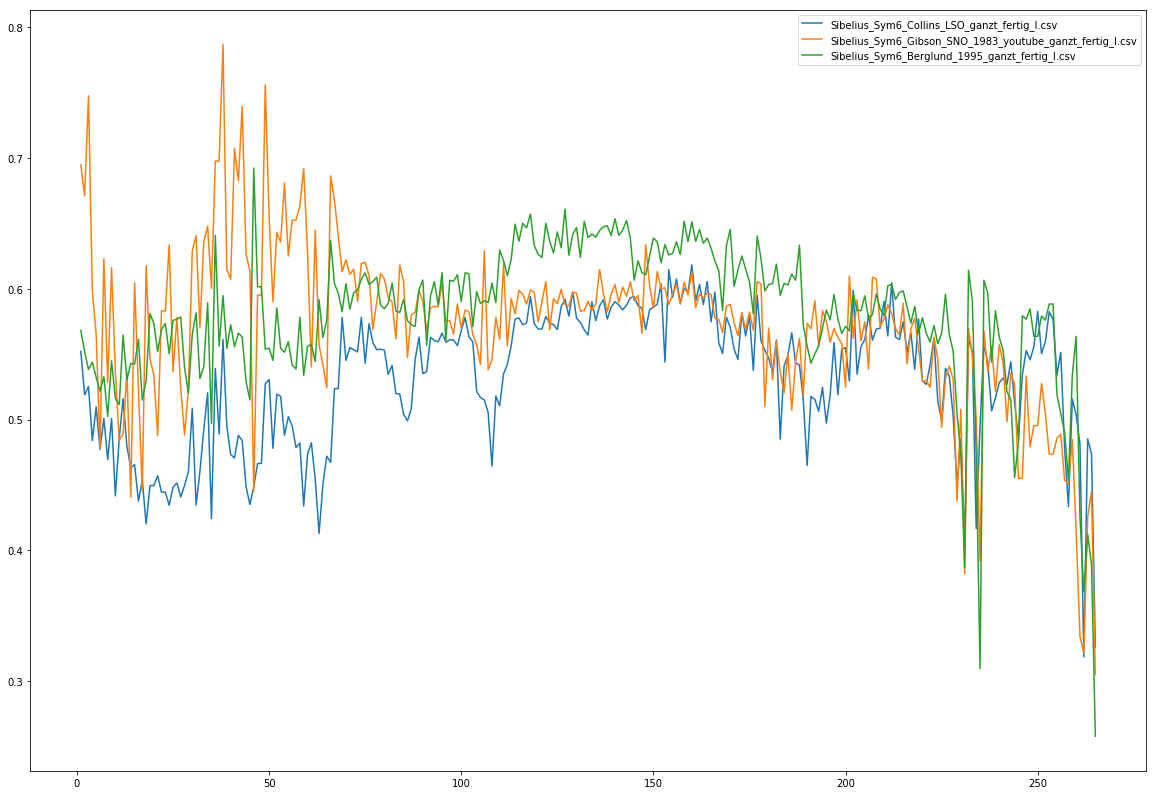

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.clear()
fig.set_figheight(14)
fig.set_figwidth(20)


for plot in plots:
    session_data = plot["session"].dictionary()
    # print(session_data["annotations"][0]["barNumber"], session_data["id"], session_data["title"])
    ax.plot(plot["x"], plot["y"], label=session_data["title"])

#ax.set_ylim([0,3])
ax.legend()


